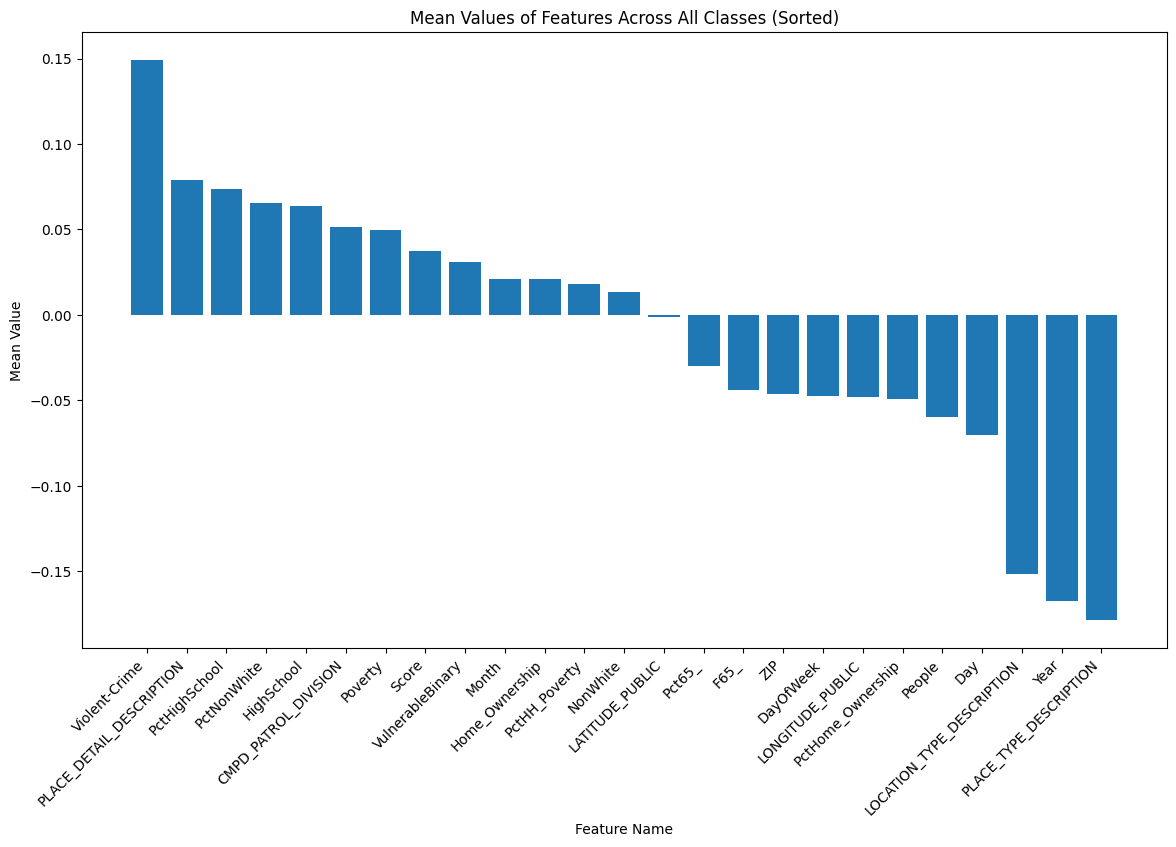

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("C:/Users/aidan_000/Desktop/UNCC/ML Project/Datasets/df6.csv", low_memory=False)

# Encode the target variable
df['HIGHEST_NIBRS_DESCRIPTION'] = LabelEncoder().fit_transform(df['HIGHEST_NIBRS_DESCRIPTION'])

# Separate features and target variable
y, x = df.pop('HIGHEST_NIBRS_DESCRIPTION').values, StandardScaler().fit_transform(df.values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes classifier
classifier = GaussianNB().fit(x_train, y_train)

# Extract mean and standard deviation for each feature
means = classifier.theta_

# Plot mean values for each feature across all classes
means_df = pd.DataFrame({'Feature': df.columns, 'Mean': np.mean(means, axis=0)}).sort_values(by='Mean', ascending=False)
plt.figure(figsize=(14, 8))
plt.bar(means_df['Feature'], means_df['Mean'])
plt.xlabel('Feature Name')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features Across All Classes (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()